In [1]:
from scipy.optimize import minimize
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# Logistic Regression with Using Scipy Minimize

In [2]:
#Load the data
ex2data1 = np.loadtxt("data/ex2data1.txt", delimiter=",")

exam_1_score = ex2data1[:, 0]
exam_2_score = ex2data1[:, 1]

X = ex2data1[:, :2]
y = ex2data1[:, -1].reshape(-1, 1)

In [6]:
#Add constant to x
constants = np.ones((len(X), 1))
X = np.concatenate((constants, X), axis=1)

m = y.size
n = X.shape[1]
thetas = np.zeros(n)

def sigmoid(z):
    return(1 / (1 + np.exp(-z)))


def calculate_cost(thetas, X, y):
    epsilon = 1e-5
    h = sigmoid(X @ thetas.reshape(-1, 1))
    
    J = np.mean(
        (y) * -1 * np.log(h + epsilon)
        + (1-y) * -1 * np.log(1 - h + epsilon)
    )
    
    if np.isnan(J):
        return np.inf
    return J


def gradient(thetas, X, y):
    h = sigmoid(X @ (thetas.reshape(-1, 1)))
    
    grad = (1 / m) * X.T @ (h - y)
    return grad.flatten()

In [7]:
minimize(
    fun=calculate_cost,
    x0=thetas,
    args=(X,y),
    method=None,
    jac=gradient,
    options={'maxiter':400}
)

      fun: 0.20348330288411376
 hess_inv: array([[ 8.09456224e+02,  8.08456224e+02, -1.29643030e+01,
        -1.30925920e+01],
       [ 8.08456224e+02,  8.09456224e+02, -1.29643030e+01,
        -1.30925920e+01],
       [-1.29643030e+01, -1.29643030e+01,  2.21469977e-01,
         1.97371655e-01],
       [-1.30925920e+01, -1.30925920e+01,  1.97371655e-01,
         2.27215203e-01]])
      jac: array([-1.52513617e-08, -1.52513617e-08, -1.43170285e-06, -4.36647298e-07])
  message: 'Optimization terminated successfully.'
     nfev: 29
      nit: 22
     njev: 29
   status: 0
  success: True
        x: array([-12.58066723, -12.58066723,   0.2062317 ,   0.20147162])

# Regularised Logistic Regression with Using Scipy Minimize

In [21]:
ex2data2 = np.loadtxt("data/ex2data2.txt", delimiter=",")

exam_1_score = ex2data2[:, 0]
exam_2_score = ex2data2[:, 1]

X = ex2data2[:, :-1]
y = ex2data2[:, -1]

In [43]:
poly = PolynomialFeatures(6)
X_poly = poly.fit_transform(X)

m = y.size
n = X_poly.shape[1]
thetas = np.zeros(n)


def sigmoid(z):
    return(1 / (1 + np.exp(-z)))


def reg_calculate_cost(thetas, LAMBDA, *args):
    h = sigmoid(X_poly @ thetas)
    print(h.shape)
    regularisation = (LAMBDA / (2 * m)) * np.sum(np.square(thetas[1:]))
    
    J = -1 * (1 / m) * ((np.log(h).T @ y) + (np.log(1 - h).T @ (1 - y))) + regularisation
    
    if np.isnan(J):
        return np.inf
    return J


def reg_gradient(thetas, LAMBDA, *args):
    h = sigmoid(X_poly @ thetas)
    
    regularisation = (LAMBDA / m) * thetas[1:]
    regularisation_theta_0_added = np.insert(regularisation, 0, 0, axis=0).reshape(n, 1)
    
    grad = (1 / m) * X_poly.T @ (h - y) + regularisation_theta_0_added
    return grad.flatten()

In [44]:
LAMBDA = 0.5

res = minimize(
            fun=reg_calculate_cost,
            x0=thetas,
            args=(LAMBDA, X_poly, y),
            method=None,
            jac=reg_gradient,
            options={'maxiter':3000}
)

here
here
here
here
(118,)


ValueError: shapes (28,28) and (784,) not aligned: 28 (dim 1) != 784 (dim 0)

In [46]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

data2 = loaddata('data/ex2data2.txt', ',')
y = np.c_[data2[:,2]]
X = data2[:,0:2]

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [48]:
X

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [49]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

    
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))


def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())


# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
XX.shape

initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.6931471805599453

In [50]:
import matplotlib.pyplot as plt

/home/cagri/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


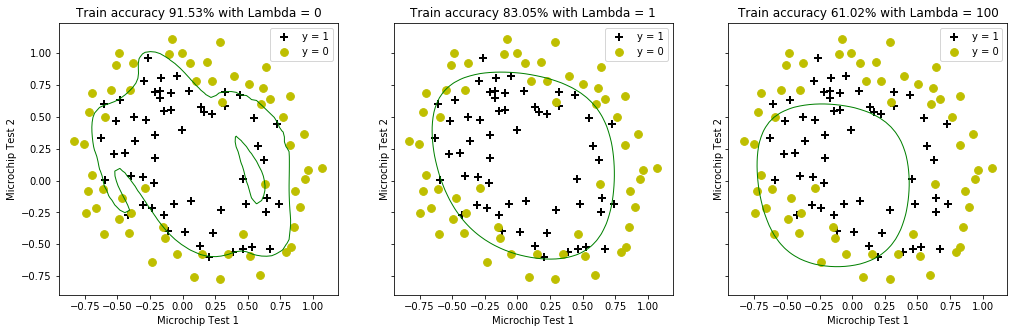

In [51]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Accuracy
    accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))